# eurovision songs of all time

#### This work will deal with the eurovision songs of all time
For each song we took its details like the name of the song, the country name of the song...

In [3]:
from bs4 import BeautifulSoup
import requests 
import time
import pandas as pd
import numpy as np

# sklearn imports
import sklearn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree

# scipy import
from scipy.special import expit
from scipy.special import logit

# matplotlib import
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

Purpose of the action:
Is scheduling requests to the site, when error 429 appears, the action stops our requests from the site for the required waiting time and when the time expires it requests the request again

In [4]:
def open_link(link_to_open):
    response1 = requests.get(link_to_open,headers=user_agent)
    soup1 = BeautifulSoup(response1.content)
    while(response1.status_code == 429): 
            time.sleep(int(response1.headers['Retry-After']))
            response1 = requests.get(link_to_open,headers=user_agent)
            soup1 = BeautifulSoup(response1.content)
    return soup1

In this block, we take the link pages of the eurovision year.
we take all the years of the eurovision except from 3 years:

2022 - the eurovision has not yet taken place,
2020 - the eurovision did not occur following the covid-19,
1956 - it was the first year of the eurovision and do not have information about the songs

In [6]:
url1="https://eurovision.tv/events"
user_agent = {'User-agent': 'GoogleChrome'}
response1 = requests.get(url1,headers=user_agent)
soup1 = BeautifulSoup(response1.content, "html.parser")
html_list_of_years = soup1.find("div",attrs={"class":"flex flex-wrap"})
links_for_years = []

for a_item in html_list_of_years("a"):
    links_for_years.append(a_item['href'])
    
#remove all the year that there is no inforamtion about them 2022,2020,1956
links_for_years.remove('https://eurovision.tv/event/turin-2022')
links_for_years.remove('https://eurovision.tv/event/rotterdam-2020')
links_for_years.remove('https://eurovision.tv/event/lugano-1956')

In this block, we make array of all link pages of the participants in specific year.

In [4]:
links_for_participants = []
linksToPages = []
    
for i in range(0,len(links_for_years)):
    soup1 = open_link(links_for_years[i])
    html_year = soup1.find("div",attrs = {"class":"scrollable-pill-nav flex px-4 py-4 lg:px-10 text-white space-x-3"})
    linksToPages = [t['href'] for t in html_year.findAll("a")]
    links_for_participants.append(linksToPages[1])

In this block, each participants page has a direct link to the details of the all song in specific year.

we remove one song because, this song is withdrew from the competition but still voted so we do not have information about him.

In [5]:
#contain all the link pages to all the songs
links_for_songs = []

for link in links_for_participants:
    soup1 = open_link(link)
    html_song = soup1.find("div",attrs={"class":"flex flex-wrap"})
    for a_item in html_song.findAll("a",attrs={"class":"absolute top-0 left-0 w-full h-full outline-none"}):
        links_for_songs.append(a_item['href'])
        
#we remove this song, explanation above
links_for_songs.remove('https://eurovision.tv/participant/withdrew-from-the-competition-but-still-voted')

In this block, we get into every song and took all the information.

for each song we get the information:

singer,country,country capital,event year,event country,song name,lyrics,music,broadcaster,
perform on internet,place semi final,place final,score semi final,score final,number of participants on semi final,number of participants on final,number of countries vote in semi final,number of countries vote in final,
amount of participant until this year,victories until this year,day in week final, day in week semi,amount of participant in the event,higher point given in semi final,higher point given in final,smaller point given in semi final,smaller point in final,was in final or not,amount of countries given points in semi final,amounts of countries given points in final,
number in song semi final and number song in final.

Songs that lack the specific information we have added to the list in the appropriate place -.
For example, a song that did not reach the final, all the information related to the final will appear on it by -

In [6]:
#list of each information
song_singer=[]
song_country=[]
song_country_capital=[]
event_year=[]
event_country=[]
song_name=[]
song_lyrics=[]
song_music=[]
song_broadcaster=[]
perform_on_internet=[]
place_semi_final=[]
place_final=[]
score_semi_final=[]
score_final=[]
count_country_semi=[]
count_country_final=[]
count_country_vote_semi=[]
count_country_vote_final=[]
amount_of_participant_until_this_year=[]
victories_until_this_year=[]
day_in_week_final=[]
day_in_week_semi=[]
count_participant_in_the_event=[]
higher_point_in_semi=[]
higher_point_in_final=[]
smaller_point_in_semi=[]
smaller_point_in_final=[]
was_in_final_or_not=[]
count_country_given_semi=[]
count_country_given_final=[]
number_song_semi=[]
number_song_final=[]

for i in range(0,len(links_for_songs)):
    soup1 = open_link(links_for_songs[i])
    ##song singer
    song_singer.append(soup1.find("h1",attrs={"class":"text-xl md:text-4xl font-bold leading-tight tracking-wide mt-1"}).get_text().strip())
    #other details
    html_details = soup1.find("dl",attrs={"class":"space-y-4"})
    details = html_details.findAll("div")
    ##song country
    song_country.append(details[0].find("span",attrs={"class":"group-hover:underline"}).get_text().strip())
    #event year an country
    event_and_country = details[1].find("a",attrs={"class":"text-blue-600 hover:underline"}).get_text().strip()
    event_year.append(event_and_country.split()[-1])
    event_country.append(' '.join(event_and_country.split()[0:-1]))
    #song name
    song_name.append(details[2].find("div",attrs={"class":"mr-2"}).get_text().strip())
    on_the_internet=[]
    if(details[2].find("div",attrs={"class":"flex space-x-2 items-center"}).get_text().strip()!=''):
        on_the_internet.append(details[2].find("div",attrs={"class":"flex space-x-2 items-center"}).get_text().strip())
    #song lyrics
    song_lyrics.append(details[6].find("dd",attrs={"class":"text-sm font-bold"}).get_text().strip())
    song_music.append(details[7].find("dd",attrs={"class":"text-sm font-bold"}).get_text().strip())
    #song Broadcaster
    if(details[-1].get_text().strip()==""):
        html_img = details[-1].find("img")
        song_broadcaster.append(html_img['alt'])
    else:
        song_broadcaster.append(details[-1].find("a").get_text().strip())
    #perform_on_internet
    html_internet_div = html_details.find("div",attrs={"class":"space-y-2"})
    if(html_internet_div.get_text().strip()==""):
        perform_on_internet.append(len(on_the_internet))
    else:
        for link_to_a in html_internet_div.findAll("a"):
            on_the_internet.append(link_to_a.get_text().strip().split()[-1])
        perform_on_internet.append(len(set(on_the_internet)))
    #place
    a_places = html_details.findAll("a",attrs={"class":"group block"})
    #reset the lists
    place_semi_final.append("-")
    score_semi_final.append("-")
    place_final.append("-")
    score_final.append("-")
    count_country_semi.append("-")
    count_country_final.append("-")
    count_country_vote_semi.append("-")
    count_country_vote_final.append("-")
    higher_point_in_semi.append("-")
    higher_point_in_final.append("-")
    smaller_point_in_semi.append("-")
    smaller_point_in_final.append("-")
    was_in_final_or_not.append("no")
    count_country_given_semi.append("-")
    number_song_semi.append("-")
    number_song_final.append("-")
    name_semi=""
    for a in a_places:
        name_a = a.find("dt",attrs={"class":"mb-1 font-bold text-sm leading-tight text-gray-600"}).get_text().strip()
        place = a.find("span",attrs={"class":"text-blue-600 group-hover:underline"}).get_text().strip().split()[-1]##10th
        place_number = place.replace("th", "")
        place_number = place_number.replace("rd", "")
        place_number = place_number.replace("nd", "")
        place_number = place_number.replace("st", "")##place
        soup = open_link(a['href'])
        sort_link = open_link(soup.findAll("a",attrs={"class":"inline-flex items-center text-grey-dark no-underline"})[-1]['href'])
        list_link = sort_link.findAll("div",attrs={"class":"bg-gray-200 shadow mb-8 text-black"})
        #number song semi and final and score
        number_song_perform_table = sort_link.find("table",attrs={"class":"hidden lg:table w-full"})
        number_song_perform_table_body = number_song_perform_table.find("tbody")
        number_song_perform_tr= number_song_perform_table_body.findAll("tr",attrs={"class":"border-b border-grey text-sm"})
        for link_tr in number_song_perform_tr:
            link_name_tr = link_tr.find("a",attrs={"class":"flex items-center font-bold text-blue-600 hover:underline"}).get_text().strip()
            if(link_name_tr == song_country[-1]):
                number_song_in_event = link_tr.find("td",attrs={"class":"p-4 pl-6"}).get_text().strip()
                number_point=link_tr.find("td",attrs={"class":"p-4 text-right"}).get_text().strip()##number
                if(number_point=="—"):
                    number_point=0
                break
        #how much country  
        #higher point in semi and final
        #smaller point in semi and final
        #count country given semi
        details_score = soup.find("div",attrs={"class":"px-4 lg:px-8 xl:px-10"})
        details_score_link = details_score.findAll("a")[1]
        details_score_page = open_link(details_score_link['href'])  
        option_select = details_score_page.findAll("option")
        for i_place in range(1,len(option_select)):
            if(option_select[i_place].get_text().strip()==song_country[-1]):
                new_page = open_link(option_select[i_place]['value'])
                div1 = new_page.findAll("div",attrs={"class":"flex flex-wrap"})
                div=div1[len(div1)-2]
                div_count_country = div.findAll("tr",attrs={"class":"text-base"})
                div_voted=div1[len(div1)-1]
                div_count_country_voted = div_voted.findAll("tr",attrs={"class":"text-base"})
                if(int(event_year[-1]) >=2016):
                    names_countries_vote=[]
                    for name_country_vote in div_count_country:
                        names_countries_vote.append(name_country_vote.findAll("td")[-1].get_text().strip())
                    div_count_country=set(names_countries_vote)
                    names_countries_voted=[]
                    for name_country_voted in div_count_country_voted:
                        names_countries_voted.append(name_country_voted.findAll("td")[-1].get_text().strip())
                    div_count_country_voted=set(names_countries_voted)
                higher_score=0
                smaller_score=13
                if(len(div_count_country)>0):
                    for div_kind in div.findAll("div"):
                        higher_score_tr = div_kind.findAll("tr")[1]
                        if(len(higher_score_tr)>0):
                            higher_score_td = int(higher_score_tr.findAll("td")[0].get_text().strip())
                            if(higher_score_td > higher_score):
                                higher_score=higher_score_td
                        for index in range(1,len(div_kind.findAll("tr"))):
                            div_tr_index = div_kind.findAll("tr")[index]
                            div_tr_td = div_tr_index.findAll("td")[0]
                            if(div_tr_td.get_text().strip().isnumeric()):
                                if(smaller_score > int(div_tr_td.get_text().strip())):
                                    smaller_score=int(div_tr_td.get_text().strip())
                    if(smaller_score==13):
                        smaller_score=0
                break
        if(name_a =="Second Semi-Final" or name_a=="First Semi-Final" or name_a=="Semi-Final"):
            place_semi_final[-1] = place_number
            score_semi_final[-1]=number_point
            count_country_semi[-1]=len(list_link)
            count_country_vote_semi[-1]=len(div_count_country)
            count_country_given_semi[-1]=len(div_count_country_voted)
            higher_point_in_semi[-1]=higher_score
            smaller_point_in_semi[-1]=smaller_score
            number_song_semi[-1]=number_song_in_event
            name_semi = name_a
        else:##final
            place_final[-1] = place_number
            score_final[-1] = number_point
            count_country_final[-1]=len(list_link)
            count_country_vote_final[-1]=len(div_count_country)
            higher_point_in_final[-1]=higher_score
            smaller_point_in_final[-1]=smaller_score
            number_song_final[-1]=number_song_in_event
            was_in_final_or_not[-1]="yes"
    #amount of participant and victories until this year
    country_link = details[0].find("a")
    country_page = open_link(country_link['href'])
    details_country = country_page.find("div",attrs={"class":"space-y-4"})
    details_country_victory_list = details_country.findAll("div")[4]
    check_virctory = details_country_victory_list.find("dd",attrs={"class":"text-sm font-bold"})
    count_victory = 0
    if(check_virctory.get_text().strip()!="None"):
        for a_year_victory in check_virctory.findAll("a"):
            if(int(a_year_victory.get_text().strip().split()[0])<int(event_year[-1])):
                count_victory+=1
    victories_until_this_year.append(count_victory)
    count_participant = 0
    details_participant_years = country_page.findAll("a",attrs={"class":"text-blue-600 font-bold hover:underline"})
    for a_year_participant in details_participant_years:
            if(int(a_year_participant.get_text().strip().split()[-1])<int(event_year[-1])):
                count_participant+=1
    amount_of_participant_until_this_year.append(count_participant)
    #song country capital
    capital_details = details_country.findAll("div")[1]
    capital_details_name = capital_details.find("dd",attrs={"class":"text-sm font-bold"}).get_text().strip()
    song_country_capital.append(capital_details_name)
    #day semi and final
    about_event_link=details[1].find("a",attrs={"class":"text-blue-600 hover:underline"})
    about_event_page=open_link(about_event_link['href'])
    deails_about_dl = about_event_page.find("dl",attrs={"class":"space-y-4"})
    deails_about_dd = deails_about_dl.findAll("dd",attrs={"class":"text-sm font-bold"})
    details_about_div_final = deails_about_dd[len(deails_about_dd)-7]
    day_in_week_final.append(details_about_div_final.get_text().strip().split(",")[0])
    if(name_semi == "First Semi-Final" or name_semi == "Semi-Final"):
        day_in_week_semi.append(deails_about_dd[0].get_text().strip().split(",")[0])
    elif(name_semi == "Second Semi-Final"):
        day_in_week_semi.append(deails_about_dd[1].get_text().strip().split(",")[0])
    else:
        day_in_week_semi.append("-")
    #count_participant_in_the_event
    participant = about_event_page.find("div",attrs = {"class":"scrollable-pill-nav flex px-4 py-4 lg:px-10 text-white space-x-3"})
    linksToParticipantPages = [t['href'] for t in participant.findAll("a")]
    participant_page = open_link(linksToParticipantPages[1])
    participant_page_div = participant_page.find("div",attrs={"class":"flex flex-wrap"})
    number_of_participant = participant_page_div.findAll("a",attrs={"class":"absolute top-0 left-0 w-full h-full outline-none"})
    count_participant_in_the_event.append(len(number_of_participant))
    #count country given final
    final_page = open_link(linksToParticipantPages[-1])
    details_score_final = final_page.find("div",attrs={"class":"px-4 lg:px-8 xl:px-10"})
    details_score_link_final = details_score_final.findAll("a")[1]
    details_score_page_final = open_link(details_score_link_final['href'])  
    option_select_final = details_score_page_final.findAll("option")
    for i_place in range(1,len(option_select_final)):
            if(option_select_final[i_place].get_text().strip()==song_country[-1]):
                new_page = open_link(option_select_final[i_place]['value'])
                div1 = new_page.findAll("div",attrs={"class":"flex flex-wrap"})
                div_voted=div1[len(div1)-1]
                div_count_country_voted = div_voted.findAll("tr",attrs={"class":"text-base"})
                if(int(event_year[-1]) >=2016):
                    names_countries_voted=[]
                    for name_country_voted in div_count_country_voted:
                        names_countries_voted.append(name_country_voted.findAll("td")[-1].get_text().strip())
                    div_count_country_voted=set(names_countries_voted)
                count_country_given_final.append(len(div_count_country_voted))
                break

In this block, we create the DataFrame with all the information we have gathered.
after that we load the DataFrame to csv, so we can use it later without loading the crawling code from scratch

In [7]:
df=pd.DataFrame({"song name":song_name,
                 "song singer":song_singer,
                 "song country":song_country,
                 "song country capital":song_country_capital,
                 "event year":event_year,
                 "event country":event_country,
                 "song lyrics":song_lyrics,
                 "song music":song_music,
                 "count participant in the event":count_participant_in_the_event,
                 "amount of participant until this year":amount_of_participant_until_this_year,
                 "victories until this year":victories_until_this_year,
                 "number song semi final":number_song_semi,
                 "place semi final":place_semi_final,
                 "score semi final":score_semi_final,
                 "higher point in semi final":higher_point_in_semi,
                 "smaller point in_semi final":smaller_point_in_semi,
                 "count country semi final":count_country_semi,
                 "count country vote semi final":count_country_vote_semi,
                 "count country given semi final":count_country_given_semi,
                 "day in week semi final":day_in_week_semi,
                 "was in final or not":was_in_final_or_not,
                 "number song final":number_song_final,
                 "place final":place_final,
                 "score final":score_final,
                 "higher point in final":higher_point_in_final,
                 "smaller point in final":smaller_point_in_final,
                 "count country final":count_country_final,
                 "count country vote final":count_country_vote_final,
                 "count country given final":count_country_given_final,
                 "day in week final":day_in_week_final,
                 "song broadcaster":song_broadcaster,
                 "perform on internet":perform_on_internet})
df.to_csv("EurovisionTable.csv")

#### After we have finished the crawling, we will start an initial analysis of the information and add columns that can help us

We will change the values of some columns:
1. We will change the column "was in final or not" from yes / no to 1/0.
2. We will change the score 13 that does not exist to a score 0 in the "smaller point in final" and "smaller point in_semi final" columns.
3. We will change their hyphen to a hyphen that the system knows (so that gibrish does not appear in our csv)

In [22]:
df=pd.read_csv("EurovisionTable.csv")

#1
replace_map = {'no':0,'yes':1}
df.replace(replace_map,inplace=True)

#2
replace_map ={"13":"0"}
df["smaller point in final"].replace(replace_map,inplace=True)
df["smaller point in_semi final"].replace(replace_map,inplace=True)

#3
replace_map ={"—":"-"}
df.replace(replace_map,inplace=True)

#### We will add columns that can help for the next steps of the investigation (EDA, ML)

1. We created two columns of quantity composers and writers. (For those who did not show the above information, we put the number 0 in its place)
2. The number of times the country reached the final, up to that year.
3. We checked whether the country won the final of the previous year or not (if so we will write 1 if we do not write 0)
4. We checked if the country was in the final in the first three places (if so we will write 1 if we do not write 0) 

In [9]:
#1
count_music=[]
count_lyrics=[]
df_copy = df[['song lyrics','song music']]
for i in range(0,df.shape[0]):
    if(df_copy.iloc[i,0]=="-"):
        count_lyrics.append(0)
    else:
        count_lyrics.append(len(df_copy.iloc[i,0].split(",")))
    if(df_copy.iloc[i,1]=="-"):
        count_music.append(0)
    else:
        count_music.append(len(df_copy.iloc[i,1].split(",")))
df['count music']=count_music
df['count lyrics']=count_lyrics

In [10]:
#2
array_until = [0]*df.shape[0]
#we create list of all the countries without duplicates
df_country=df["song country"].drop_duplicates(keep='first')
for i in range(0,df_country.shape[0]):
    df_c2 = df[df["song country"]==df_country.iloc[i]]
    count=0
    for j in range(df_c2.shape[0]-1,-1,-1):
        array_until[df_c2.iloc[j,0]]=count
        count = count + df["was in final or not"].iloc[df_c2.iloc[j,0]]
df["until now be in final"]=array_until

In [11]:
#3
win_year_before = [0]*df.shape[0]
#we create list of all the countries without duplicates
df_win=df["song country"].drop_duplicates(keep='first')

for i in range(0,df_win.shape[0]):
    df_win2 = df[df["song country"]==df_win.iloc[i]]
    for j in range(df_win2.shape[0]-2,-1,-1):
        if(df_win2["place final"].iloc[j+1]=="1"):
            win_year_before[df_win2.iloc[j,0]]=1
df["win year before"]=win_year_before

In [12]:
#4
reached_the_winning_trio= [0]*df.shape[0]

for i in range(0,df.shape[0]):
    if((df['place final'].iloc[i]=="1") | (df['place final'].iloc[i]=="2") | (df['place final'].iloc[i]=="3")):
        reached_the_winning_trio[i]=1
df["reached the winning trio"]=reached_the_winning_trio

After the update, we saved the new table in a new csv file

In [13]:
df.to_csv("EurovisionTableUpdate.csv")

#### EDA

The places that Ireland won in the final and semi

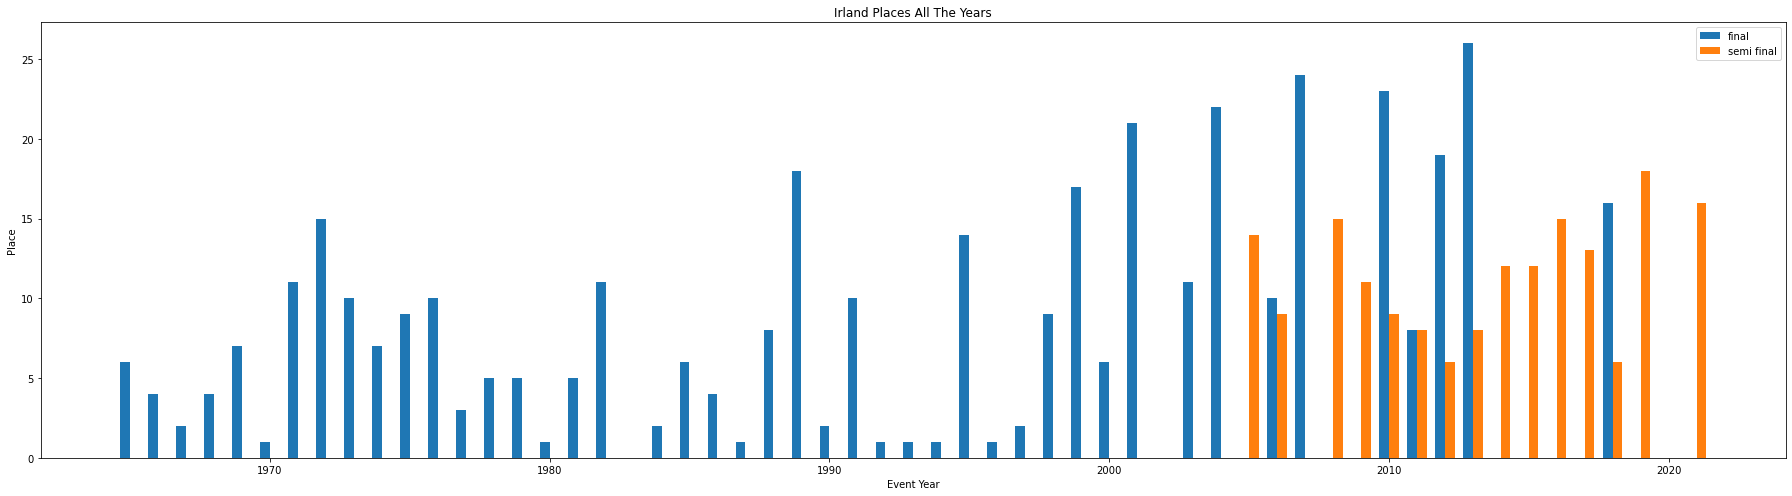

In [14]:
df_irland = df[(df["song country"]=="Ireland")]
df_irland = df_irland[['event year','place final', 'place semi final']]

replace_map ={"-":0}
df_irland['place final'].replace(replace_map,inplace=True)
df_irland['place semi final'].replace(replace_map,inplace=True)

df_irland['place final']=pd.to_numeric(df_irland['place final'])
df_irland['place semi final']=pd.to_numeric(df_irland['place semi final'])

df_irland['event year']=pd.to_numeric(df_irland['event year'])

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25,7))
rects1 = ax.bar(df_irland['event year'] - width/2,  df_irland['place final'], width, label='final')
rects2 = ax.bar(df_irland['event year'] + width/2,  df_irland['place semi final'], width, label='semi final')

ax.set_ylabel('Place')
ax.set_xlabel('Event Year')
ax.set_title('Irland Places All The Years')
ax.legend()

fig.tight_layout()

plt.show()

The number of points of Israel throughout the years

<ipython-input-15-3fdd6c7155ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_israel_small['event year'] = df_israel_small['event year'].astype(str)
C:\Users\ofekm\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-15-3fdd6c7155ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

Text(0.5, 1.0, 'Israel Score All The Years')

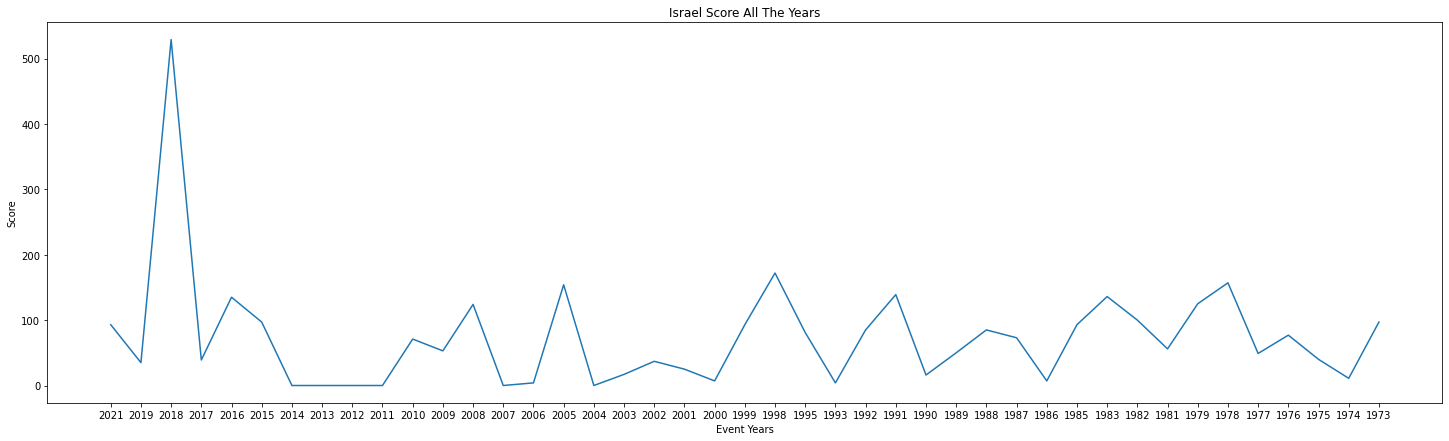

In [15]:
df_israel = df[(df["song country"]=="Israel")]
df_israel_small = df_israel[['event year','score final','perform on internet']]
df_israel_small['event year'] = df_israel_small['event year'].astype(str)

replace_map ={"-":0}
df_israel_small['score final'].replace(replace_map,inplace=True)

fig, ax = plt.subplots(figsize=(25,7))
df_israel_small['score final']=pd.to_numeric(df_israel_small['score final'])
plt.plot(df_israel_small['event year'], df_israel_small['score final'])
plt.ylabel('Score')
plt.xlabel('Event Years')
plt.title('Israel Score All The Years')

The use of the Internet to publish the song that participates in the eurovision in Israel

Text(0.5, 1.0, 'Israel Perform On Internet All The Years')

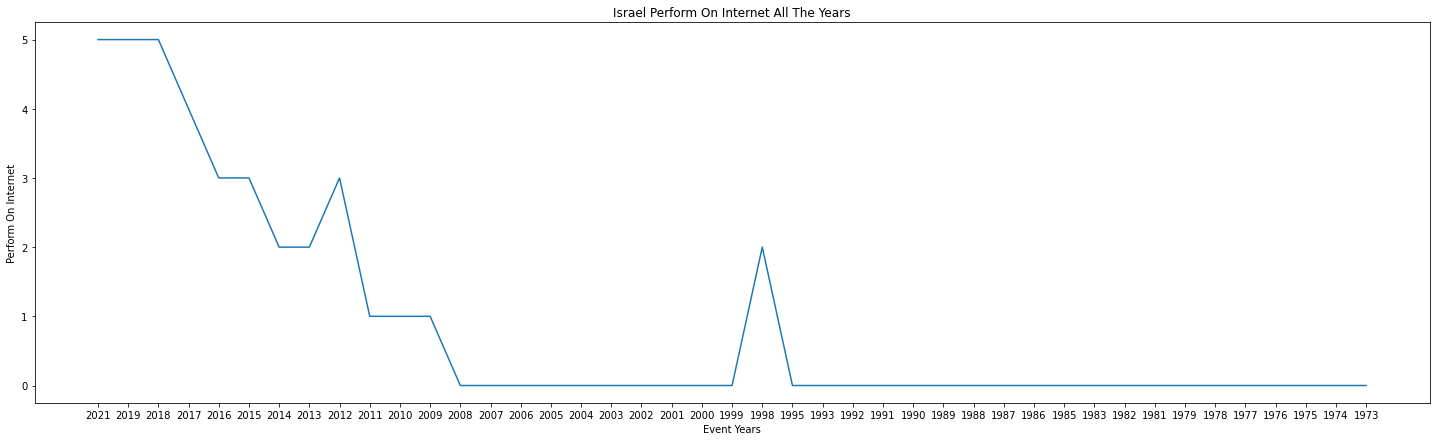

In [16]:
fig, ax = plt.subplots(figsize=(25,7))
plt.plot(df_israel_small['event year'], df_israel_small['perform on internet'])
plt.ylabel('Perform On Internet')
plt.xlabel('Event Years')
plt.title('Israel Perform On Internet All The Years')

The amount of victories of all the countries that have managed to win to date

Text(0.5, 1.0, 'Victories Until Today')

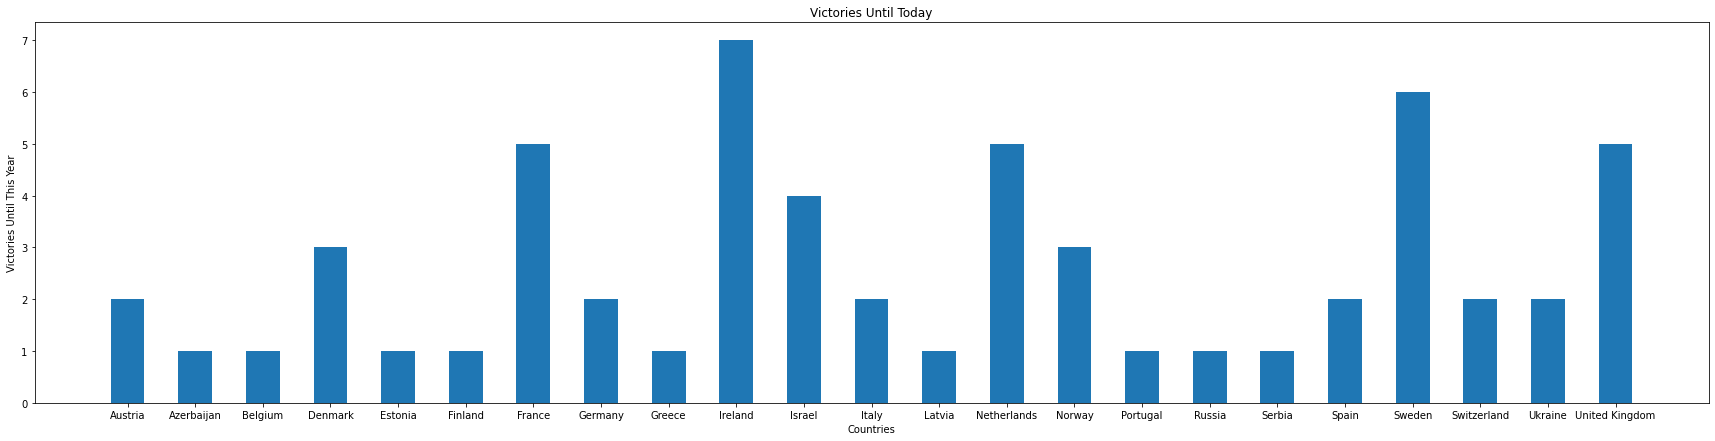

In [17]:
df_victoris = df[(df["event year"]==2021) & (df["victories until this year"] !=0)]
df_victoris = df_victoris[['song country','victories until this year']]

fig,axes=plt.subplots(figsize=(30,7))

plt.bar(df_victoris['song country'], df_victoris['victories until this year'], width = 0.5)

plt.ylabel('Victories Until This Year')
plt.xlabel('Countries')
plt.title('Victories Until Today')

The number of times a country has reached the top three places in the final

Text(0.5, 1.0, 'Count in trio in final for which country')

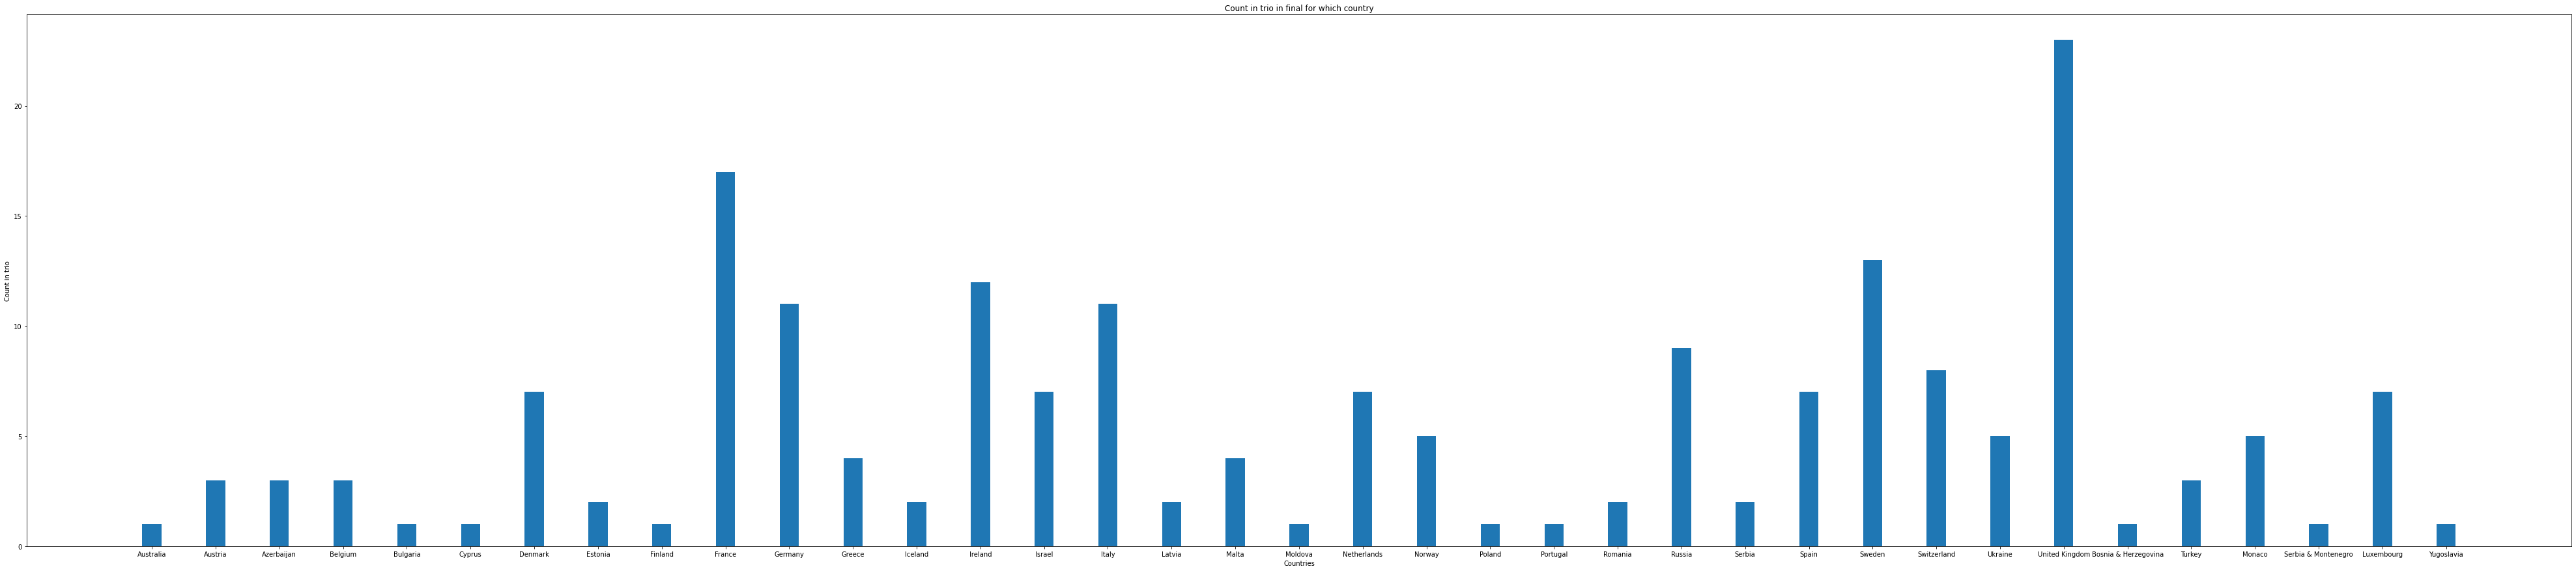

In [18]:
df_drop_duplicated= df.drop_duplicates(subset =["song country"],keep='first')
array_song_country=df_drop_duplicated["song country"].values

count_trio_places_in_final =[0]*len(array_song_country)
for i in range(0,len(array_song_country)):
    df_song_country = df[df["song country"]==array_song_country[i]]
    for j in range(0,df_song_country.shape[0]):
        if(df_song_country.iloc[j,-1]==1):
            count_trio_places_in_final[i]+=1
count_trio_places_in_final_new =[]
array_song_country_new =[]
for i in range(0,len(count_trio_places_in_final)):
    if(count_trio_places_in_final[i]!= 0):
        count_trio_places_in_final_new.append(count_trio_places_in_final[i])
        array_song_country_new.append(array_song_country[i])

fig,axes=plt.subplots(figsize=(70,15))

plt.bar(array_song_country_new, count_trio_places_in_final_new, width = 0.3)

plt.ylabel('Count in trio')
plt.xlabel('Countries')
plt.title('Count in trio in final for which country')


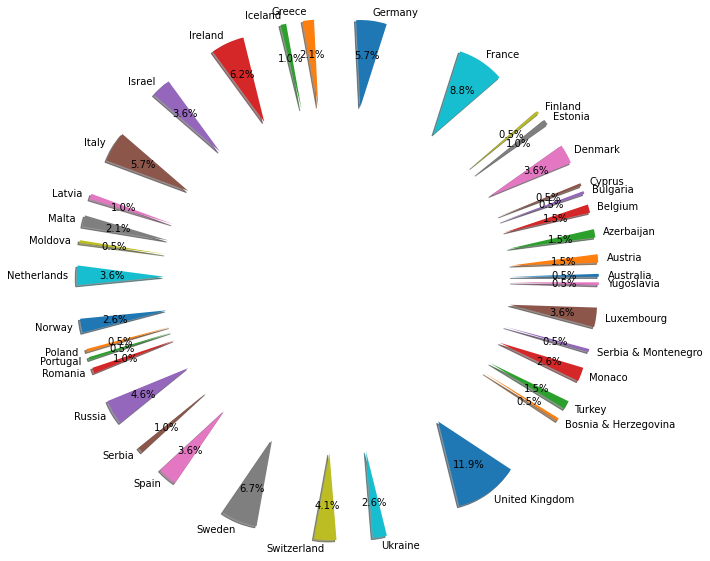

In [19]:
plt.pie(count_trio_places_in_final_new,labels = array_song_country_new,explode =[2]*len(array_song_country_new) , autopct='%1.1f%%',shadow=True,)
plt.show()


The number of countries that were in the final in 2017

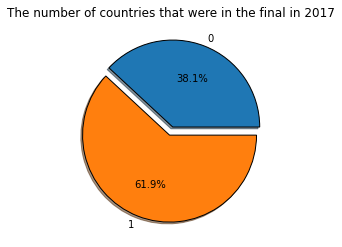

In [20]:
df_2017 = df[df['event year']==2017]
array_was_in_final= df_2017['was in final or not'].values

array = [0,0]
for i in range(0,len(array_was_in_final)):
    array[array_was_in_final[i]]+=1
    
array_index = [0,1]
array_new_value = [0]*len(array_index)
for i in range(0,len(array_index)):
    array_new_value[i]=array[array_index[i]]
    
plt.pie(array_new_value,labels = array_index,explode =[0.05]*len(array_index) , autopct='%1.1f%%',shadow=True,
       wedgeprops={"edgecolor":"black","linewidth":1,"antialiased":True})
plt.title("The number of countries that were in the final in 2017")
plt.show()


The amount of low scores in 2017

<ipython-input-21-6da1b9170935>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_smaller["smaller point in final"]=pd.to_numeric(df_new_smaller["smaller point in final"])


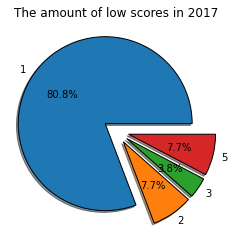

In [21]:
df_new_smaller=df_2017[df_2017["smaller point in final"]!="-"]
df_new_smaller["smaller point in final"]=pd.to_numeric(df_new_smaller["smaller point in final"])
array_smaller = df_new_smaller["smaller point in final"].values

array = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(array_smaller)):
    array[array_smaller[i]]+=1
    
df_array= df_new_smaller.drop_duplicates(subset =["smaller point in final"],keep='first')
array_index = df_array["smaller point in final"].values
array_new_value = [0]*len(array_index)
for i in range(0,len(array_index)):
    array_new_value[i]=array[array_index[i]]
    
plt.pie(array_new_value,labels = array_index,explode =[0.15]*len(array_index) , autopct='%1.1f%%',shadow=True,
       wedgeprops={"edgecolor":"black","linewidth":1,"antialiased":True})
plt.title("The amount of low scores in 2017")
plt.show()


The amount of high scores in 2017

<ipython-input-22-d40ddd1435aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["higher point in final"]=pd.to_numeric(df_new["higher point in final"])


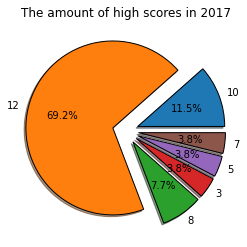

In [22]:
df_2017 = df[df['event year']==2017]
df_new=df_2017[df_2017["higher point in final"]!="-"]
df_new["higher point in final"]=pd.to_numeric(df_new["higher point in final"])
array_higher = df_new["higher point in final"].values


array = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(array_higher)):
    array[array_higher[i]]+=1
    
df_array= df_new.drop_duplicates(subset =["higher point in final"],keep='first')
array_index = df_array["higher point in final"].values
array_new_value = [0]*len(array_index)
for i in range(0,len(array_index)):
    array_new_value[i]=array[array_index[i]]
    
plt.pie(array_new_value,labels = array_index,explode =[0.15]*len(array_index) , autopct='%1.1f%%',shadow=True,
       wedgeprops={"edgecolor":"black","linewidth":1,"antialiased":True})
plt.title("The amount of high scores in 2017")
plt.show()


#### Machine Learning

Our three prediction questions are:
1. Is it possible to predict which countries will advance to the finals?
2. Is it possible to predict what the lowest score each country will receive in the final?
3. Is it possible to predict who will be the first three places in the final?

Question 1:
in this question we use LogisticRegression 
our lables : 0 - the song was not in the final, 1- the song was in the final

we decided to predict which countries will advance to the final stage, we took the whole list of songs. We reduced it to all those who have a semi-final (there were years when there was no semi-final) and on them we examined the data.

In [23]:
lrm=linear_model.LogisticRegression()
df_has_a_semi = df[df['event year']>=2004]
df_all=df_has_a_semi[['amount of participant until this year',
                       'number song semi final','perform on internet','count music',
                        'count lyrics','until now be in final',
                         'was in final or not']]
replace_map ={"-":0}
df_all.replace(replace_map,inplace=True)
df_all= df_all[df_all["number song semi final"]!=0]

df_x =df_all[['amount of participant until this year',
                           'number song semi final','perform on internet','count music',
                            'count lyrics','until now be in final']]

XTrain, XTest, yTrain, yTest = train_test_split(df_x,df_all["was in final or not"], random_state=1, test_size=0.2)

lrm.fit(XTrain,yTrain)
y_pred = lrm.predict(XTest)
y_actual=yTest
metrics.confusion_matrix(y_actual, y_pred)

print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred))
print("recall is:",metrics.recall_score(y_actual, y_pred))
print("f1 is:",metrics.f1_score(y_actual, y_pred))

accuracy is: 0.7117117117117117
precision is: 0.6857142857142857
recall is: 0.8275862068965517
f1 is: 0.75


C:\Users\ofekm\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Question 2:
In this question we checked what the low score the country will get from the other countries in the final, we used guided learning using the KNN method.

Due to the fact that there were years in which there was no semi-final, we decided to divide it into two parts:

1. Part One - We took only the countries that had a semi-final, and participated in both it and the final, and on them we examined the data of the semi-final.
2. Part two - more general, without reference to the semifinals, and examined according to general characteristics that all the songs that were in the final have.

Part One

In [24]:
df_has_a_semi = df[df['event year']>=2004]
replace_map ={"-":0}
df_has_a_semi.replace(replace_map,inplace=True)
df_final= df_has_a_semi[(df_has_a_semi["number song final"]!=0)]
df_final = df_final[(df_final["number song semi final"]!=0)]

df_final_x = df_final[['number song final','count lyrics','count music','victories until this year',
                      'count country final','score semi final','place semi final','higher point in semi final',
                       'smaller point in_semi final','count country vote semi final','perform on internet','win year before']]
df_final_y = df_final['smaller point in final']

XTrain, XTest, yTrain, yTest = train_test_split(df_final_x, df_final_y, random_state=1, test_size=0.2)

k = 6
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)
y_pred=clf.predict(XTest)
print('Accuracy with semi final = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy with semi final =  0.8666666666666667


C:\Users\ofekm\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Part Two:

In [25]:
df_has_a_semi = df
replace_map ={"-":0}
df_has_a_semi.replace(replace_map,inplace=True)
df_final= df[(df["number song final"]!=0)]

df_final_x = df_final[['number song final','count lyrics','victories until this year',
                      'count country final','amount of participant until this year',
                       'perform on internet','count music','count participant in the event','win year before']]
df_final_y = df_final['smaller point in final']

XTrain, XTest, yTrain, yTest = train_test_split(df_final_x, df_final_y, random_state=1, test_size=0.2)

k = 8
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)
y_pred=clf.predict(XTest)
print('Accuracy general = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))


Accuracy general =  0.6779026217228464


Question 3:
We predicted whether the song would reach one of the first three places in the final.
We used a decision tree model.

We used GridSearchCV to see what the depth is and what amount of leaves to use to be the most accurate. 
1. Part One - We took only the countries that had a semi-final, and participated in both it and the final, and on them we examined the data of the semi-final. 
2. Second part - more general, without reference to the semi-finals, and examined according to general characteristics that all the songs that were in the final have.

Part One:

In [26]:
df_winning_trio = df[df['event year']>=2004]
replace_map ={"-":0}
df_winning_trio.replace(replace_map,inplace=True)
df_final= df_winning_trio[(df_winning_trio["number song final"]!=0)]
df_final = df_final[(df_final["number song semi final"]!=0)]

df_final_x = df_final[['number song final','count lyrics','count music','victories until this year',
                      'count country final','score semi final','place semi final','higher point in semi final',
                       'smaller point in_semi final','count country vote semi final','perform on internet','win year before']]
df_final_y = df_final['reached the winning trio']

XTrain, XTest, yTrain, yTest = train_test_split(df_final_x, df_final_y, random_state=1, test_size=0.2)

parameters = {'max_depth':[2,4,6],"min_samples_split":[5,10,20,25,50] }
dt = tree.DecisionTreeClassifier()

clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_)

XTrain, XTest, yTrain, yTest = train_test_split(df_final_x, df_final_y, random_state=1, test_size=0.2)

decisionTree = tree.DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'])
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data with semi final= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))


C:\Users\ofekm\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


best parameter set is: {'max_depth': 2, 'min_samples_split': 20}
Accuracy on test data with semi final=  0.8666666666666667


Part Two:

In [27]:
df_winning_trio = df
replace_map ={"-":0}
df_winning_trio.replace(replace_map,inplace=True)
df_final= df[(df["number song final"]!=0)]

df_final_x = df_final[['number song final','count lyrics','victories until this year',
                      'count country final','amount of participant until this year',
                       'perform on internet','count music','count participant in the event','win year before']]
df_final_y = df_final['reached the winning trio']

XTrain, XTest, yTrain, yTest = train_test_split(df_final_x, df_final_y, random_state=1, test_size=0.2)
parameters = {'max_depth':[2,4,6],"min_samples_split":[5,10,20,25,50] }
dt = tree.DecisionTreeClassifier()

clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_)

decisionTree = tree.DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'])
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data general= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))


best parameter set is: {'max_depth': 2, 'min_samples_split': 5}
Accuracy on test data general=  0.8614232209737828


In [38]:
links_for_songs = []


soup1 = open_link("https://eurovision.tv/event/rotterdam-2020/participants")
html_song = soup1.find("div",attrs={"class":"flex flex-wrap"})
for a_item in html_song.findAll("a",attrs={"class":"absolute top-0 left-0 w-full h-full outline-none"}):
    links_for_songs.append(a_item['href'])

In [44]:
#list of each information
song_lyrics=[]
song_music=[]
perform_on_internet=[]
amount_of_participant_until_this_year=[]
number_song_semi=[]
song_country=[]
event_year=[]

for i in range(0,len(links_for_songs)):
    soup1 = open_link(links_for_songs[i])
    song_country.append(details[0].find("span",attrs={"class":"group-hover:underline"}).get_text().strip())
    #event year an country
    event_and_country = details[1].find("a",attrs={"class":"text-blue-600 hover:underline"}).get_text().strip()
    event_year.append(event_and_country.split()[-1])
    #other details
    html_details = soup1.find("dl",attrs={"class":"space-y-4"})
    details = html_details.findAll("div")
    on_the_internet=[]
    if(details[2].find("div",attrs={"class":"flex space-x-2 items-center"}).get_text().strip()!=''):
        on_the_internet.append(details[2].find("div",attrs={"class":"flex space-x-2 items-center"}).get_text().strip())
    #song lyrics
    song_lyrics.append(details[6].find("dd",attrs={"class":"text-sm font-bold"}).get_text().strip())
    song_music.append(details[7].find("dd",attrs={"class":"text-sm font-bold"}).get_text().strip())
    #perform_on_internet
    html_internet_div = html_details.find("div",attrs={"class":"space-y-2"})
    if(html_internet_div.get_text().strip()==""):
        perform_on_internet.append(len(on_the_internet))
    else:
        for link_to_a in html_internet_div.findAll("a"):
            on_the_internet.append(link_to_a.get_text().strip().split()[-1])
        perform_on_internet.append(len(set(on_the_internet)))
    number_song_semi.append("-")
    name_semi=""
    a_places = html_details.findAll("a",attrs={"class":"group block"})
    for a in a_places:
        soup = open_link(a['href'])
        sort_link = open_link(soup.findAll("a",attrs={"class":"inline-flex items-center text-grey-dark no-underline"})[-1]['href'])
        list_link = sort_link.findAll("div",attrs={"class":"bg-gray-200 shadow mb-8 text-black"})
        #number song semi and final and score
        number_song_perform_table = sort_link.find("table",attrs={"class":"hidden lg:table w-full"})
        number_song_perform_table_body = number_song_perform_table.find("tbody")
        number_song_perform_tr= number_song_perform_table_body.findAll("tr",attrs={"class":"border-b border-grey text-sm"})
        for link_tr in number_song_perform_tr:
            link_name_tr = link_tr.find("a",attrs={"class":"flex items-center font-bold text-blue-600 hover:underline"}).get_text().strip()
            if(link_name_tr == song_country[-1]):
                number_song_in_event = link_tr.find("td",attrs={"class":"p-4 pl-6"}).get_text().strip()
                number_point=link_tr.find("td",attrs={"class":"p-4 text-right"}).get_text().strip()##number
                if(number_point=="—"):
                    number_point=0
                break
        number_song_semi[-1]=number_song_in_event
    #amount of participant and victories until this year
    country_link = details[0].find("a")
    country_page = open_link(country_link['href'])
    details_country = country_page.find("div",attrs={"class":"space-y-4"})
    count_participant = 0
    details_participant_years = country_page.findAll("a",attrs={"class":"text-blue-600 font-bold hover:underline"})
    for a_year_participant in details_participant_years:
            if(int(a_year_participant.get_text().strip().split()[-1])<int(event_year[-1])):
                count_participant+=1
    amount_of_participant_until_this_year.append(count_participant)

In [45]:
df_2020=pd.DataFrame({"song country":song_country,
    "song lyrics":song_lyrics,
                 "song music":song_music,
                 "amount of participant until this year":amount_of_participant_until_this_year,
                 "number song semi final":number_song_semi,
                 "perform on internet":perform_on_internet})

In [46]:
count_music=[]
count_lyrics=[]
df_copy_2020 = df_2020[['song lyrics','song music']]
for i in range(0,df_2020.shape[0]):
    if(df_copy_2020.iloc[i,0]=="-"):
        count_lyrics.append(0)
    else:
        count_lyrics.append(len(df_copy_2020.iloc[i,0].split(",")))
    if(df_copy_2020.iloc[i,1]=="-"):
        count_music.append(0)
    else:
        count_music.append(len(df_copy_2020.iloc[i,1].split(",")))
df_2020['count music']=count_music
df_2020['count lyrics']=count_lyrics

In [47]:
print(song_country)
df_2020.to_csv("2020.csv")

['United Kingdom', 'Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine']


In [37]:
array_until=[]
df_2020["until now be in final"]=array_until

df_2020.to_csv("2020.csv")

IndexError: list assignment index out of range